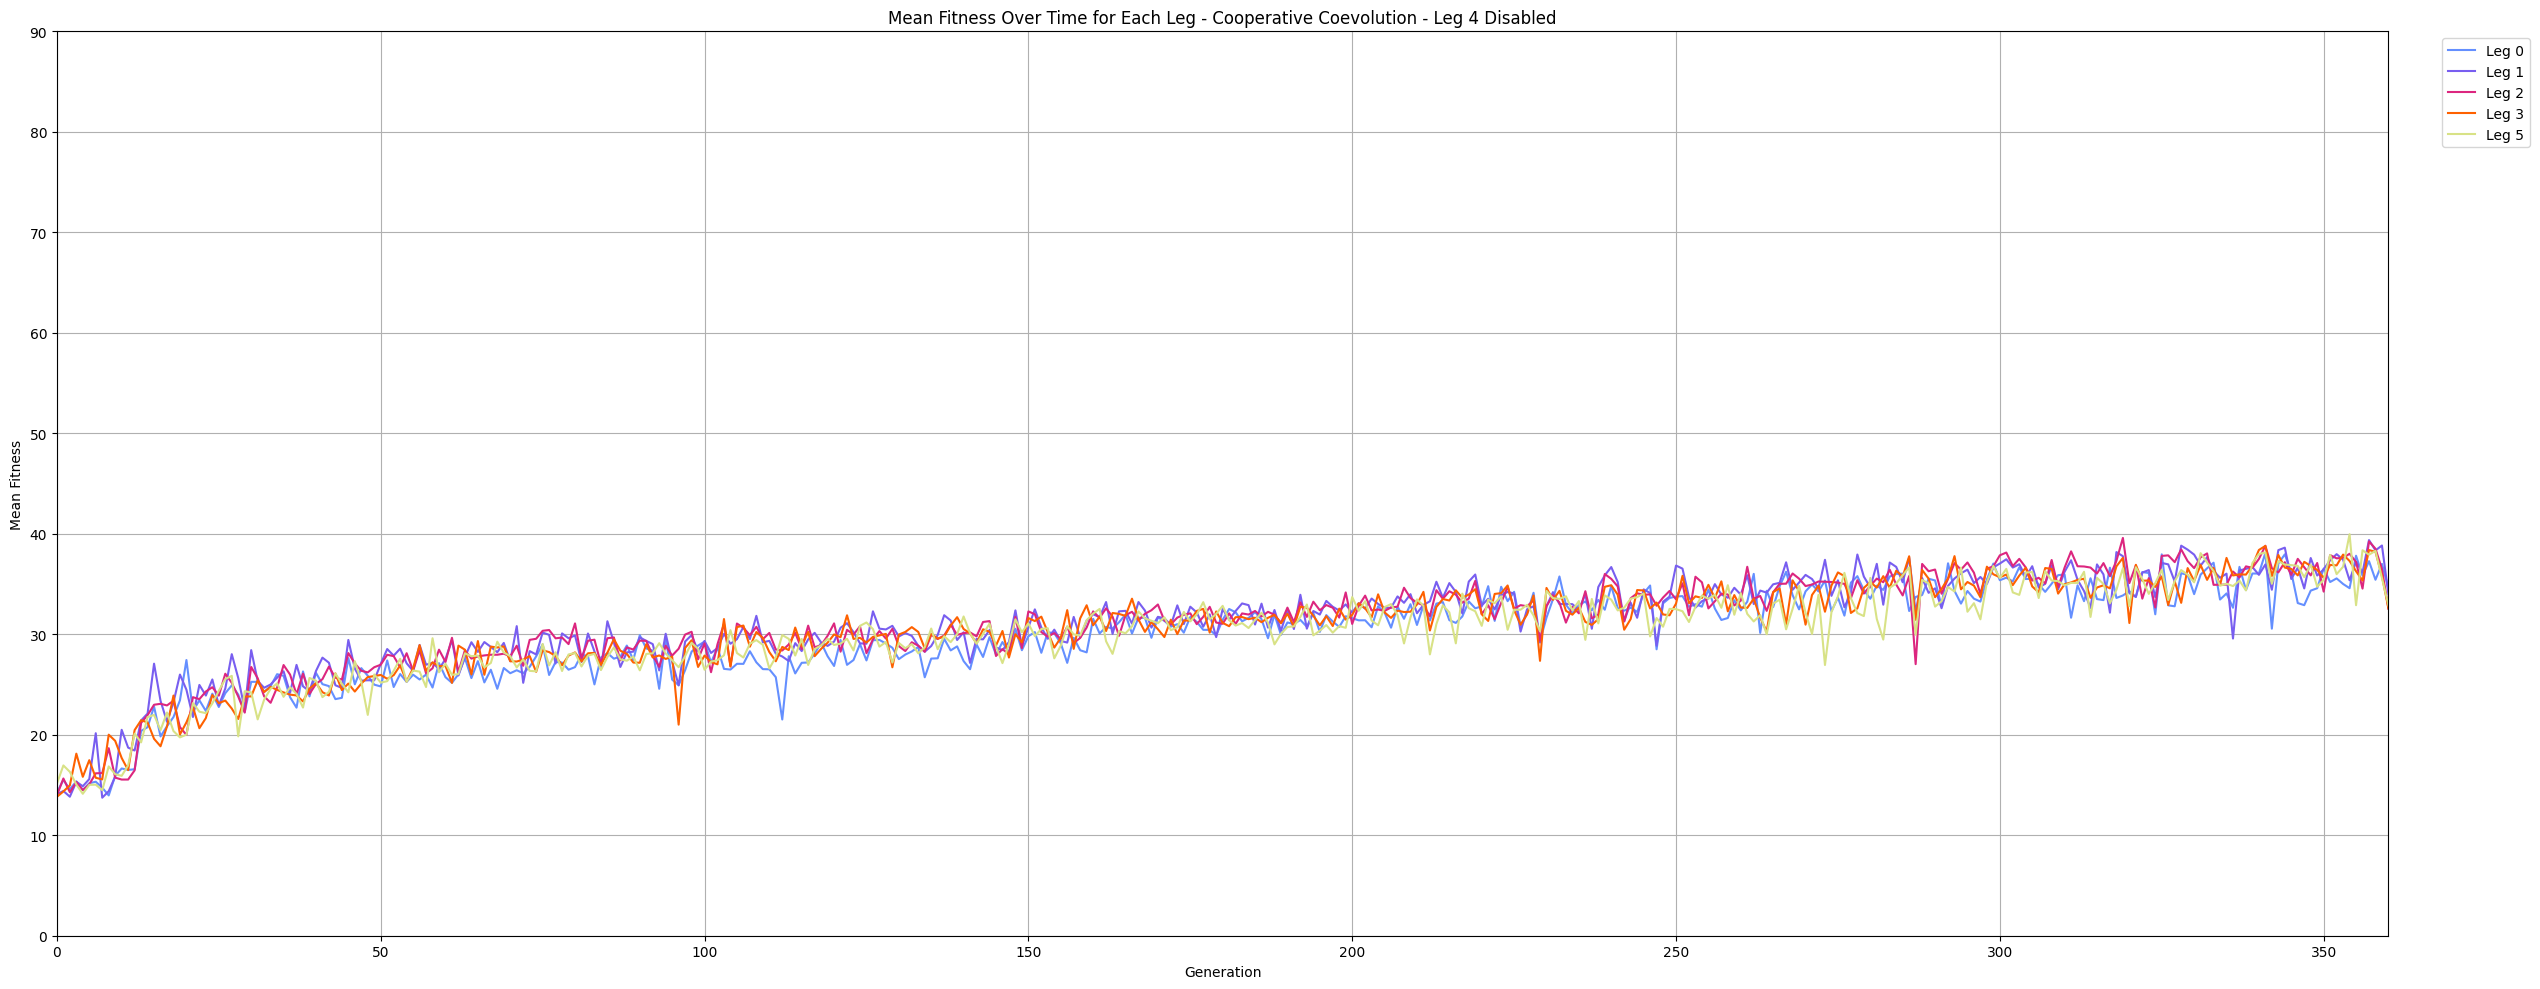

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'evolution_data.csv'
data = pd.read_csv(file_path)

# Filter data to include only generations up to 1800
data = data[data['Effective Generation'] <= 1800]

# Get unique leg indices
leg_indices = data['Leg Index'].unique()

color_map = {
    0: '#648FFF',  # Blue
    1: '#785EF0',  # Purple
    2: '#DC267F',  # Pink
    3: '#FE6100',  # Orange
    4: '#FFB000',  # Yellow
    5: '#D8E286',  # Lime
}

# Create a plot for each leg on the same graph
plt.figure(figsize=(30, 10))

for leg_index in leg_indices:
    # Filter data for the current leg
    leg_data = data[data['Leg Index'] == leg_index]
    
    # Group by generation and calculate the mean fitness for each generation
    fitness_over_time = leg_data.groupby('Effective Generation')['Fitness'].mean()
    
    # Plot the fitness over time for the current leg
    color = color_map.get(leg_index, 'k')  # Default to black if leg index not in color_map
    plt.plot(fitness_over_time, label=f'Leg {leg_index}', color=color)

# Add title and labels
plt.title('Mean Fitness Over Time for Each Leg - Cooperative Coevolution - Leg 4 Disabled')
plt.xlabel('Effective Generation')
plt.ylabel('Mean Fitness')
plt.grid(True)

# Set y/x-axis limits
plt.ylim(0, 90)
plt.xlim(0, 1800)

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()

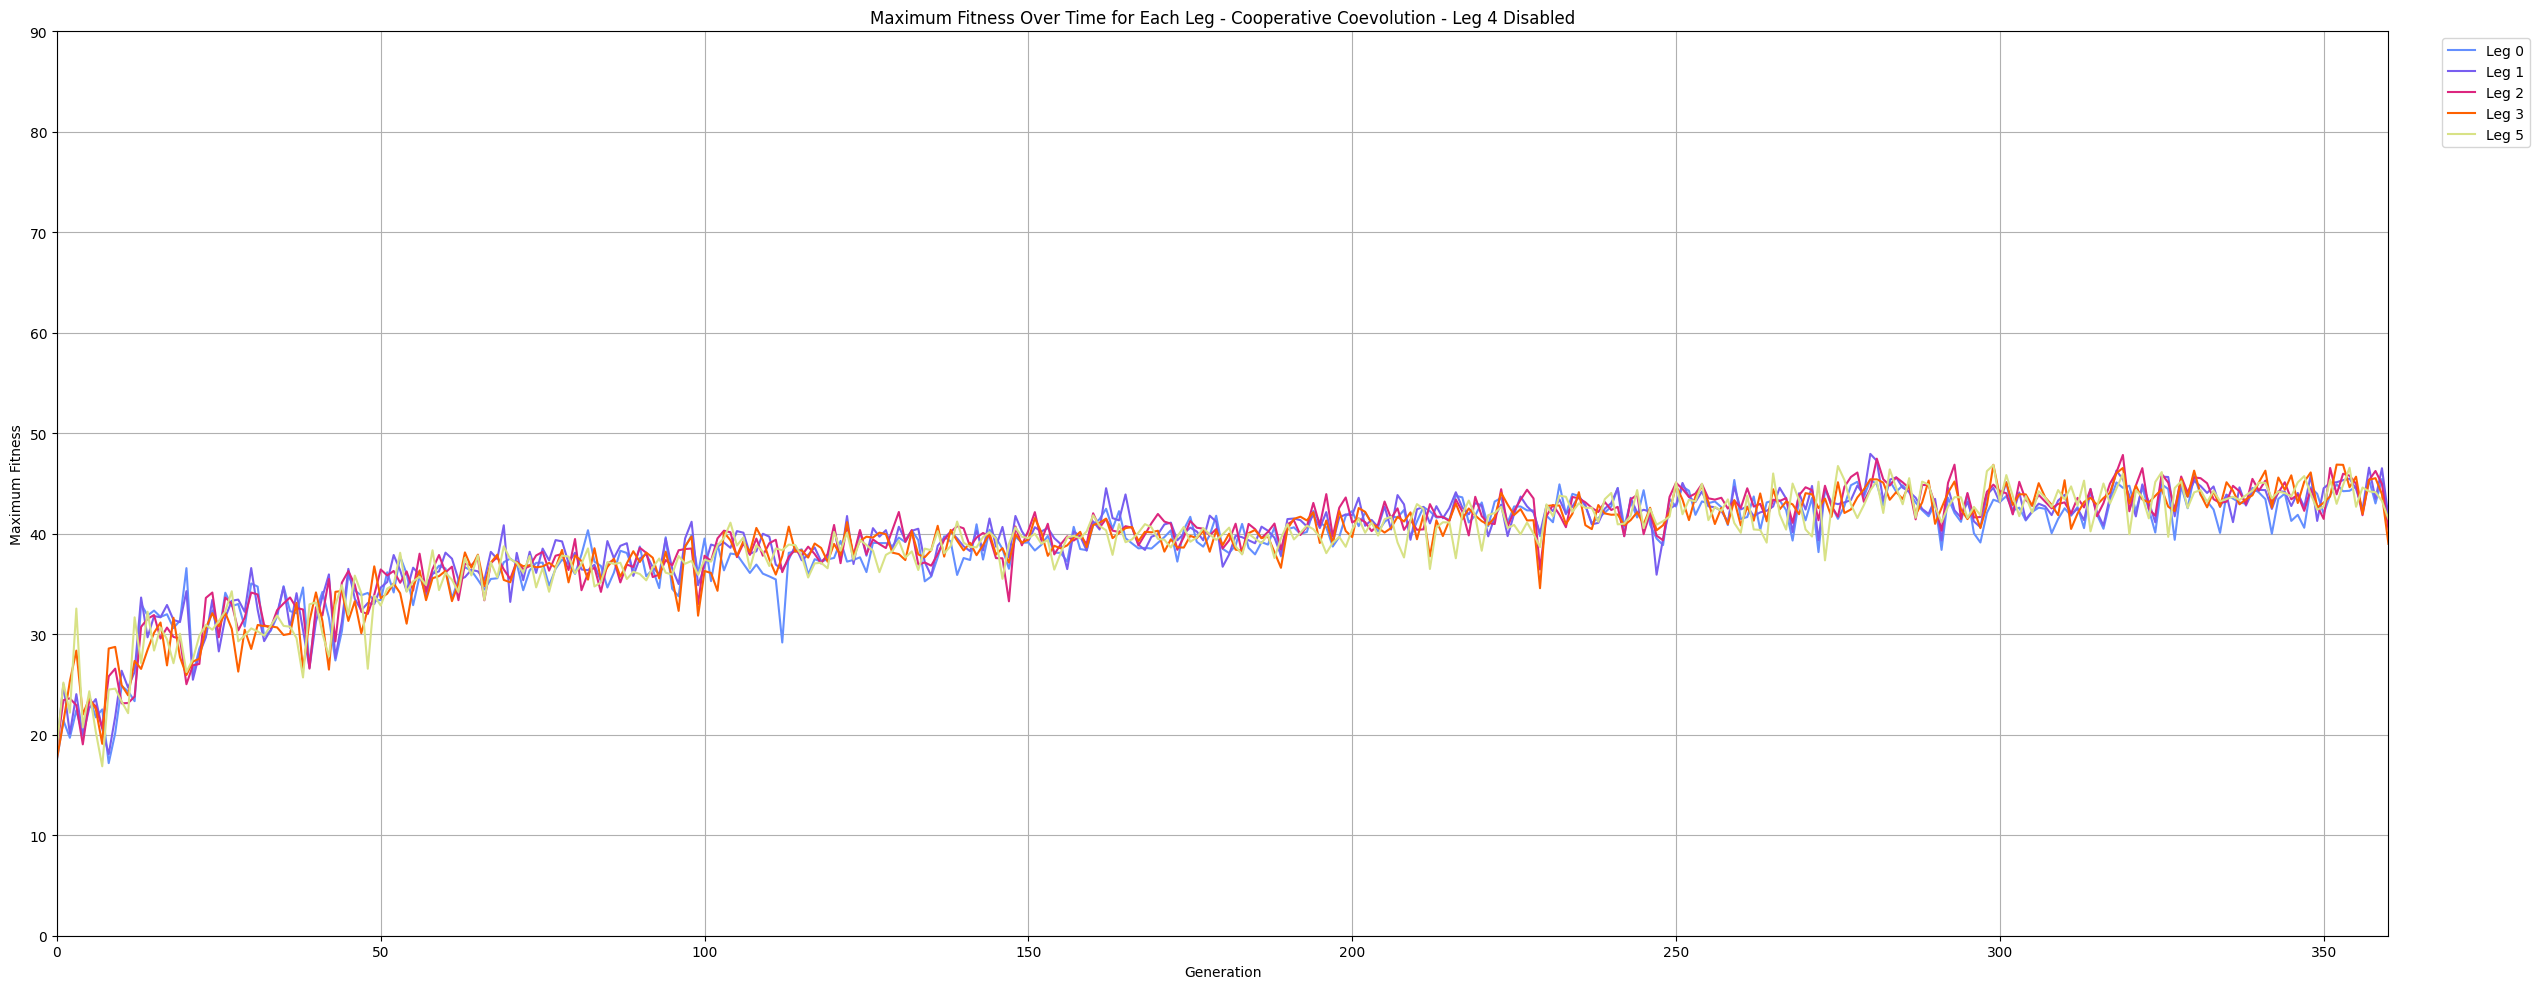

In [ ]:
# Create a plot for each leg on the same graph
plt.figure(figsize=(30, 10))

for leg_index in leg_indices:
    # Filter data for the current leg
    leg_data = data[data['Leg Index'] == leg_index]
    
    # Group by generation and calculate the maximum fitness for each generation
    fitness_over_time = leg_data.groupby('Effective Generation')['Fitness'].max()
    
    # Plot the fitness over time for the current leg
    color = color_map.get(leg_index, 'k')  # Default to black if leg index not in color_map
    plt.plot(fitness_over_time, label=f'Leg {leg_index}', color=color)

# Add title and labels
plt.title('Maximum Fitness Over Time for Each Leg - Cooperative Coevolution - Leg 4 Disabled')
plt.xlabel('Effective Generation')
plt.ylabel('Maximum Fitness')
plt.grid(True)

# Set y/x-axis limits
plt.ylim(0, 90)
plt.xlim(0, 1800)

# Add legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()

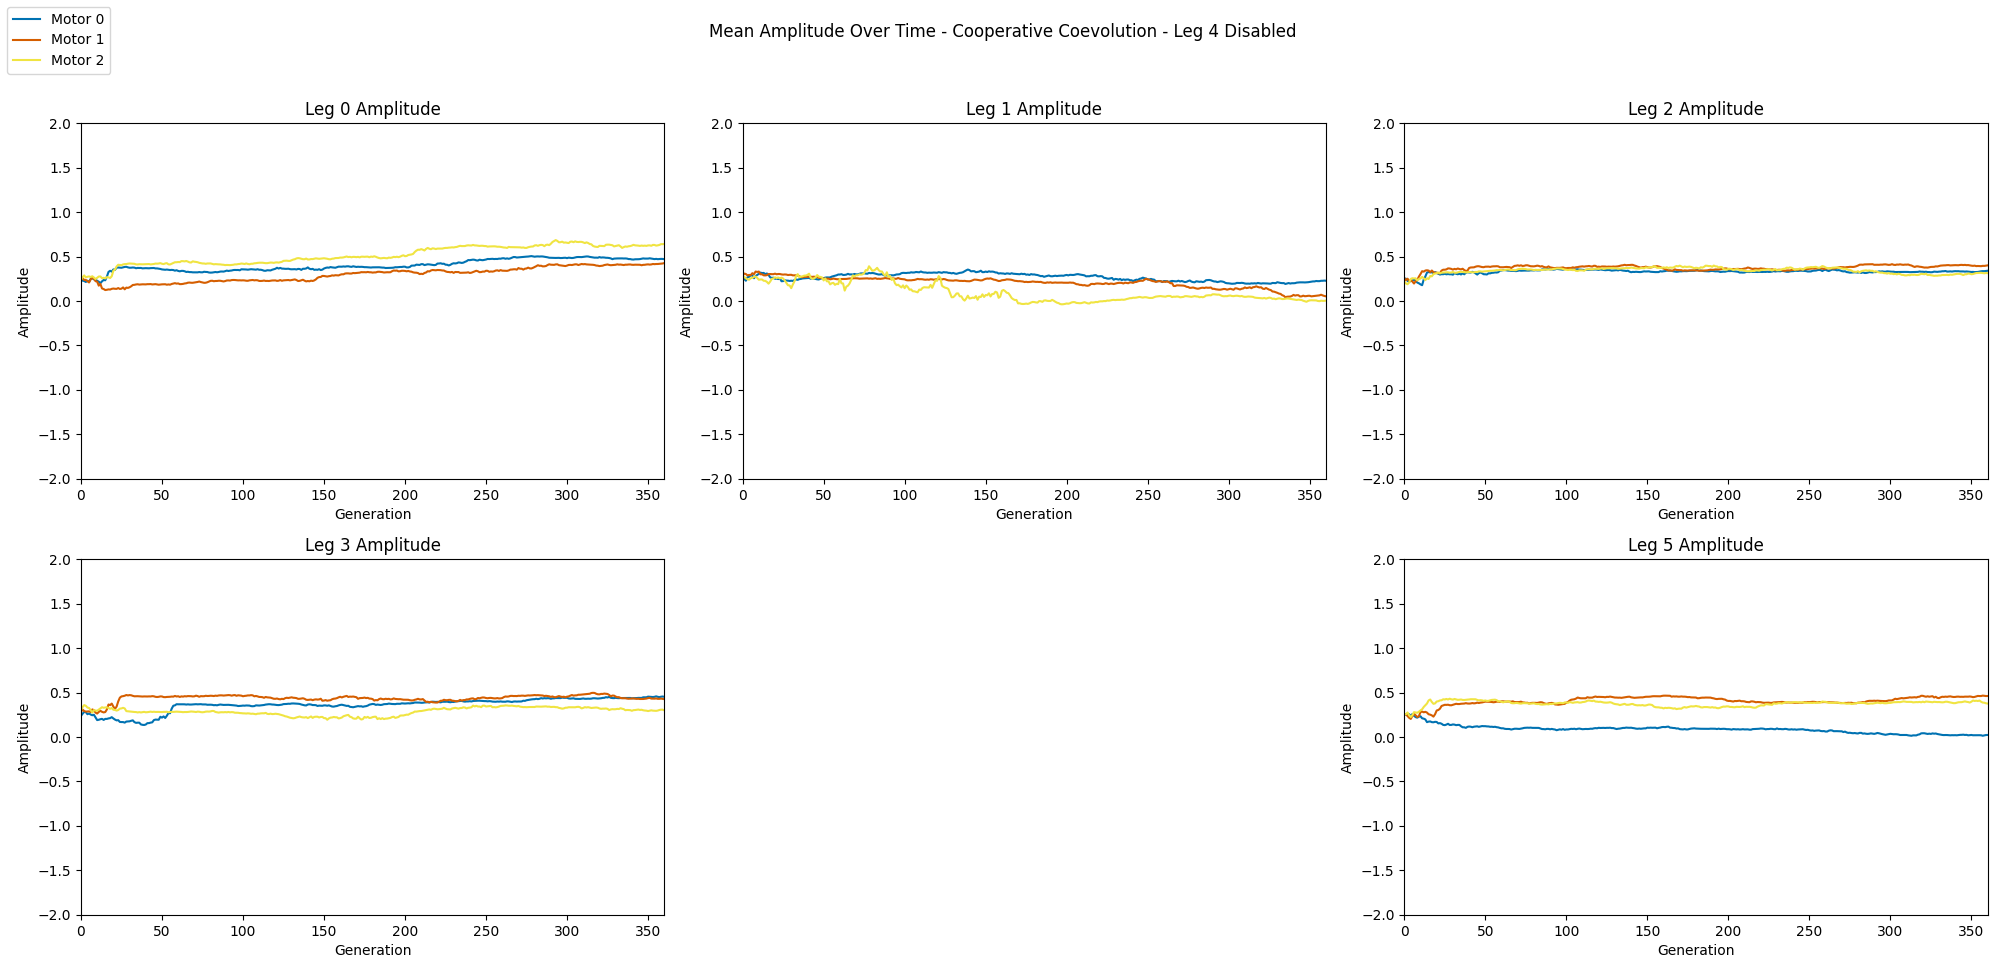

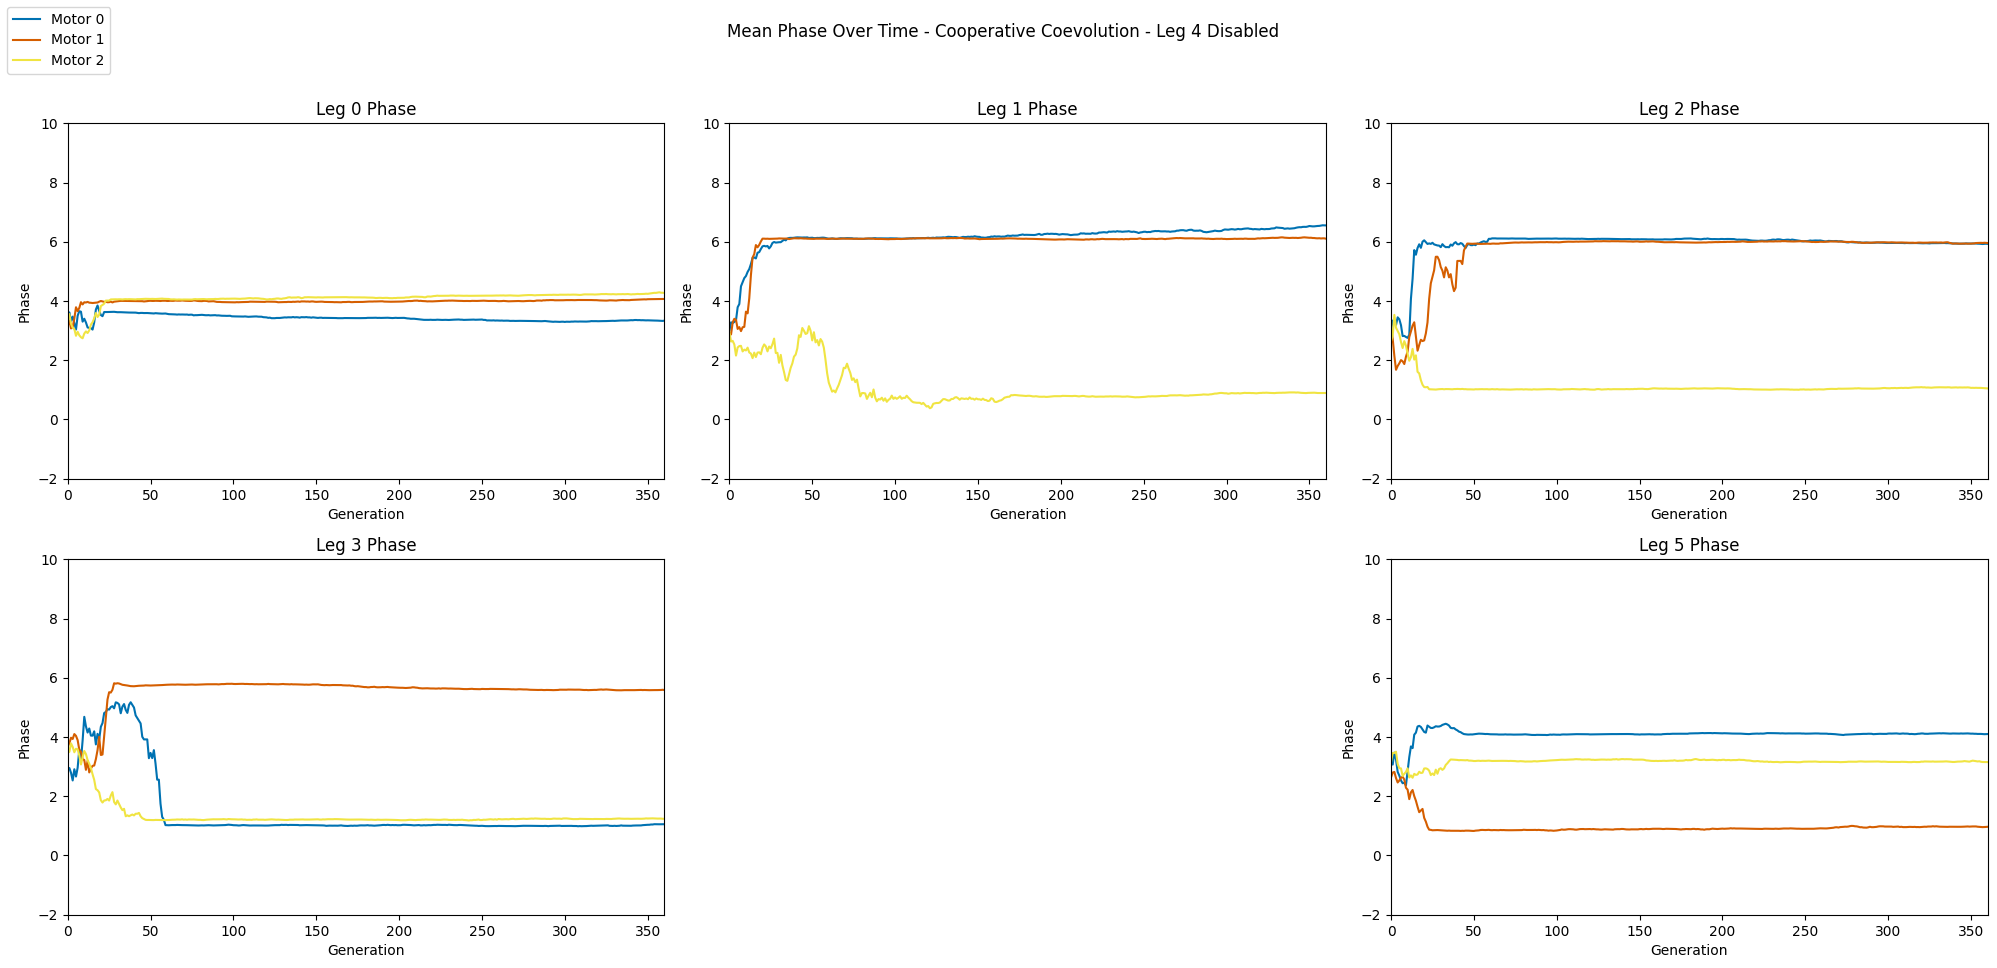

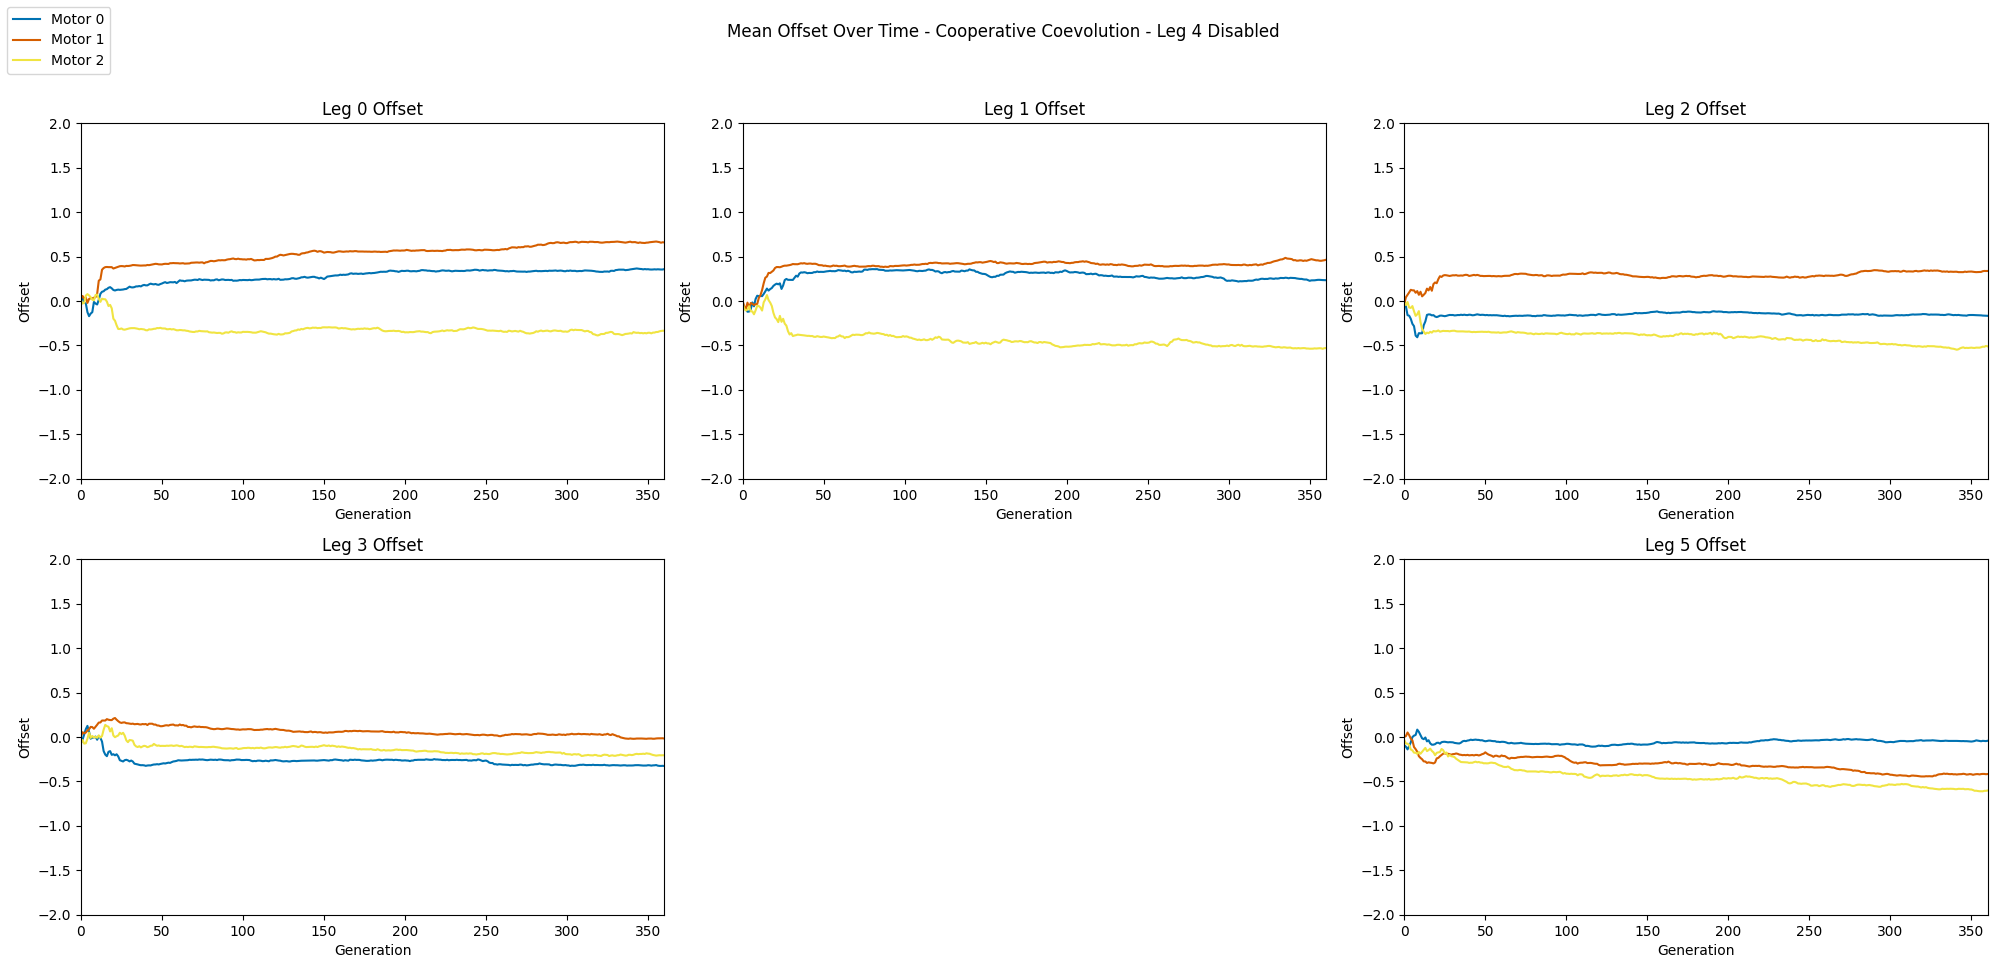

In [ ]:
import ast

# Convert string representations of lists to actual lists
data['Amplitude'] = data['Amplitude'].apply(ast.literal_eval)
data['Phase'] = data['Phase'].apply(ast.literal_eval)
data['Offset'] = data['Offset'].apply(ast.literal_eval)

color_map = {
    0: '#0072B2',  # Blue
    1: '#D55E00',  # Orange
    2: '#F0E442',  # Yellow
}

# Function to plot mean amplitude for all legs
def plot_amplitude(data):
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    fig.delaxes(axs[1,1]) # Remove empty subplot
    fig.suptitle('Mean Amplitude Over Time - Cooperative Coevolution - Leg 4 Disabled') 

    lines_labels = [[], []]  # To store lines and labels for the legend

    for leg_index in range(6):
        row = leg_index // 3
        col = leg_index % 3

        # Filter data for the specific leg
        leg_data = data[data['Leg Index'] == leg_index]

        # Check if leg data is empty and skip if it is
        if leg_data.empty:
            continue

        # Initialize lists to store mean values
        mean_amplitude = {motor: [] for motor in range(3)}
        generations = sorted(leg_data['Effective Generation'].unique())

        # Calculate mean values for each generation
        for generation in generations:
            gen_data = leg_data[leg_data['Effective Generation'] == generation]
            for motor in range(3):
                mean_amplitude[motor].append(gen_data['Amplitude'].apply(lambda x: x[motor]).mean())

        # Plot Amplitude
        for motor in range(3):
            color = color_map.get(motor, 'k')  # Default to black if motor not in color_map
            line, = axs[row, col].plot(generations, mean_amplitude[motor], label=f'Motor {motor}', color=color)
            if leg_index == 0:  # Collect lines and labels from the first row only
                lines_labels[0].append(line)
                lines_labels[1].append(f'Motor {motor}')
        axs[row, col].set_title(f'Leg {leg_index} Amplitude')
        axs[row, col].set_xlabel('Effective Generation')
        axs[row, col].set_ylabel('Amplitude')
        axs[row, col].set_xlim([0, 1800])
        axs[row, col].set_ylim([-2, 2])  

    # Create a single legend for the entire figure
    fig.legend(lines_labels[0], lines_labels[1], loc='upper left', ncol=1)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Function to plot mean phase for all legs
def plot_phase(data):
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    fig.delaxes(axs[1,1]) # Remove empty subplot
    fig.suptitle('Mean Phase Over Time - Cooperative Coevolution - Leg 4 Disabled') 

    lines_labels = [[], []]  # To store lines and labels for the legend

    for leg_index in range(6):
        row = leg_index // 3
        col = leg_index % 3

        # Filter data for the specific leg
        leg_data = data[data['Leg Index'] == leg_index]

        # Check if leg data is empty and skip if it is
        if leg_data.empty:
            continue

        # Initialize lists to store mean values
        mean_phase = {motor: [] for motor in range(3)}
        generations = sorted(leg_data['Effective Generation'].unique())

        # Calculate mean values for each generation
        for generation in generations:
            gen_data = leg_data[leg_data['Effective Generation'] == generation]
            for motor in range(3):
                mean_phase[motor].append(gen_data['Phase'].apply(lambda x: x[motor]).mean())

        # Plot Phase
        for motor in range(3):
            color = color_map.get(motor, 'k')  # Default to black if motor not in color_map
            line, = axs[row, col].plot(generations, mean_phase[motor], label=f'Motor {motor}', color=color)
            if leg_index == 0:  # Collect lines and labels from the first row only
                lines_labels[0].append(line)
                lines_labels[1].append(f'Motor {motor}')
        axs[row, col].set_title(f'Leg {leg_index} Phase')
        axs[row, col].set_xlabel('Effective Generation')
        axs[row, col].set_ylabel('Phase')
        axs[row, col].set_xlim([0, 1800])
        axs[row, col].set_ylim([-2, 10])  

    # Create a single legend for the entire figure
    fig.legend(lines_labels[0], lines_labels[1], loc='upper left', ncol=1)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Function to plot mean offset for all legs
def plot_offset(data):
    fig, axs = plt.subplots(2, 3, figsize=(20, 10))
    fig.delaxes(axs[1,1]) # Remove empty subplot
    fig.suptitle('Mean Offset Over Time - Cooperative Coevolution - Leg 4 Disabled') 

    lines_labels = [[], []]  # To store lines and labels for the legend

    for leg_index in range(6):
        row = leg_index // 3
        col = leg_index % 3

        # Filter data for the specific leg
        leg_data = data[data['Leg Index'] == leg_index]

        # Check if leg data is empty and skip if it is
        if leg_data.empty:
            continue

        # Initialize lists to store mean values
        mean_offset = {motor: [] for motor in range(3)}
        generations = sorted(leg_data['Effective Generation'].unique())

        # Calculate mean values for each generation
        for generation in generations:
            gen_data = leg_data[leg_data['Effective Generation'] == generation]
            for motor in range(3):
                mean_offset[motor].append(gen_data['Offset'].apply(lambda x: x[motor]).mean())

        # Plot Offset
        for motor in range(3):
            color = color_map.get(motor, 'k')  # Default to black if motor not in color_map
            line, = axs[row, col].plot(generations, mean_offset[motor], label=f'Motor {motor}', color=color)
            if leg_index == 0:  # Collect lines and labels from the first row only
                lines_labels[0].append(line)
                lines_labels[1].append(f'Motor {motor}')
        axs[row, col].set_title(f'Leg {leg_index} Offset')
        axs[row, col].set_xlabel('Effective Generation')
        axs[row, col].set_ylabel('Offset')
        axs[row, col].set_xlim([0, 1800])
        axs[row, col].set_ylim([-2, 2])  

    # Create a single legend for the entire figure
    fig.legend(lines_labels[0], lines_labels[1], loc='upper left', ncol=1)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plot data for all legs
plot_amplitude(data)
plot_phase(data)
plot_offset(data)